# Text Mining Project

Description

## 1. Installs and Imports

In [5]:
#pip install pandas
#!pip install langdetect
#!pip install matplotlib
#!pip install seaborn 
#!pip install re
#!pip install openpyxl
#!pip install googletrans==4.0.0-rc1
#!pip install tqdm
#!pip install wordcloud
#!pip install nltk
#!pip install google-cloud-translate
#!pip install emoji
#!pip install konlpy
#!pip install spacy
#!pip install unicode
#!pip install scikit-learn
#!pip install textblob
#!pip install gensim

In [6]:
import re
import string
import unicodedata
from collections import Counter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm

import emoji
from wordcloud import WordCloud, STOPWORDS

import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, WordNetLemmatizer

from langdetect import detect

from googletrans import Translator
from google.cloud import translate

import spacy
from spacy.cli import download

from sklearn.model_selection import train_test_split
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

import gensim.downloader as api
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS



ModuleNotFoundError: No module named 'gensim'

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')

## 2. Data Exploration and Analysis

**Checking if data was loaded Correctly**

In [ ]:
train = pd.read_excel("train.xlsx")
train_reviews = pd.read_excel("train_reviews.xlsx")
test = pd.read_excel("test.xlsx")
test_reviews = pd.read_excel("test_reviews.xlsx")

In [ ]:
train.head(5)

In [ ]:
train_reviews.head(5)

In [ ]:
test.head(5)

In [ ]:
test_reviews.head(5)

**Everything looks fine**

In [ ]:
print("train shape:", train.shape)
print("train_reviews shape:", train_reviews.shape)
print("test shape:", test.shape)
print("test_reviews shape:", test_reviews.shape)

### 2.1 Index Fix

**In the dataset, the index column has repeating values, which likely indicate that each value corresponds to a specific house. To enhance clarity, we will rename this column to 'house ID'.**

In [ ]:
train.rename(columns={'index': 'houseID'}, inplace=True)
train_reviews.rename(columns={'index': 'houseID'}, inplace=True)
test.rename(columns={'index': 'houseID'}, inplace=True)
test_reviews.rename(columns={'index': 'houseID'}, inplace=True)


In [ ]:
train.head(5)

In [ ]:
train_reviews.head(5)

In [ ]:
test.head(5)

In [ ]:
test_reviews.head(5)

### 2.2 Duplicates

**Cheacking for Duplicated Rows**

In [ ]:
print("Number of duplicated rows in train DataFrame:", train.duplicated().sum())
print("Number of duplicated rows in train_reviews DataFrame:", train_reviews.duplicated().sum())
print("Number of duplicated rows in test DataFrame:", test.duplicated().sum())
print("Number of duplicated rows in test_reviews DataFrame:", test_reviews.duplicated().sum())

**Removing Duplicated Rows**

In [ ]:
train.drop_duplicates(inplace=True)
train_reviews.drop_duplicates(inplace=True)
test.drop_duplicates(inplace=True)
test_reviews.drop_duplicates(inplace=True)

print("Number of duplicated rows in train DataFrame after removal:", train.duplicated().sum())
print("Number of duplicated rows in train_reviews DataFrame after removal:", train_reviews.duplicated().sum())
print("Number of duplicated rows in test DataFrame after removal:", test.duplicated().sum())
print("Number of duplicated rows in test_reviews DataFrame after removal:", test_reviews.duplicated().sum())


### 2.3 Null Values

In [ ]:
print("Number of null values in train DataFrame:")
print(train.isnull().sum())

print("\nNumber of null values in train_reviews DataFrame:")
print(train_reviews.isnull().sum())

print("\nNumber of null values in test DataFrame:")
print(test.isnull().sum())

print("\nNumber of null values in test_reviews DataFrame:")
print(test_reviews.isnull().sum())

In [ ]:
train_reviews[train_reviews['comments'].isnull()]

In [ ]:
train_reviews.dropna(subset=['comments'], inplace=True)
train_reviews[train_reviews['comments'].isnull()]

In [ ]:
train_reviews[train_reviews['comments'].str.len() <= 1]


**Some rows dont really have text, we will drop them later**

In [ ]:
train_original = train.copy()
train_reviews_original = train_reviews.copy()
test_original = test.copy()
test_reviews_original = test_reviews.copy()

In [ ]:
print("train shape:", train_original.shape)
print("train_reviews shape:", train_reviews_original.shape)
print("test shape:", test_original.shape)
print("test_reviews shape:", test_reviews_original.shape)

### 2.4 Merge Datasets

In [ ]:
train_merged = train_reviews.merge(train, on='houseID', how='left')
train_merged.index.name = 'reviewID'
test_merged = test_reviews.merge(test, on='houseID', how='left')
test_merged.index.name = 'reviewID'

In [ ]:
train_merged.head(5)

In [ ]:
test_merged.head(5)

In [ ]:
print("train shape:", train_merged.shape)
print("test shape:", test_merged.shape)

In [ ]:
number_of_original_houseIDs = train_merged['houseID'].nunique()
print("Number of original houseIDs:", number_of_original_houseIDs)

### 2.5 Language Diversification

**We realised that not all the reviews were on the same language, so we decided to identify which language it was in**

In [28]:
def detect_language(text):
    try:
        return detect(text)
    except:
        return "Unknown"

In [29]:
# Initialize tqdm with the total number of rows
total_rows = len(train_merged)
with tqdm(total=total_rows) as pbar:
    # Apply detect_language with progress bar to each row in description column
    def apply_and_track_progress(row):
        pbar.update(1)
        return detect_language(row)
        
    train_merged["language_reviews"] = train_merged["comments"].apply(apply_and_track_progress)
    test_merged["language_reviews"] = test_merged["comments"].apply(apply_and_track_progress)

402988it [21:29, 312.54it/s]                                                                                           


In [30]:
# Initialize tqdm with the total number of rows
total_rows = len(train_merged)
with tqdm(total=total_rows) as pbar:
    # Apply detect_language with progress bar to each row in description column
    def apply_and_track_progress(row):
        pbar.update(1)
        return detect_language(row)

    train_merged["language_description"] = train_merged["description"].apply(apply_and_track_progress) 
    test_merged["language_description"] = test_merged["description"].apply(apply_and_track_progress)

402988it [27:40, 242.67it/s]                                                                                           


### 2.6 Visualizations

**Languages Counts Reviews**

**Languages Codes**

'en': English 'pt': Portuguese 'fr': French 'es': Spanish 'de': German 'da': Danish 'no': Norwegian 'sv': Swedish 'it': Italian 'ca': Catalan 'zh-cn': Chinese (Simplified) 'nl': Dutch

C:\Users\TCastilho\AppData\Local\Temp\ipykernel_16480\179341475.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=language_counts.index, y=language_counts.values, palette="viridis")


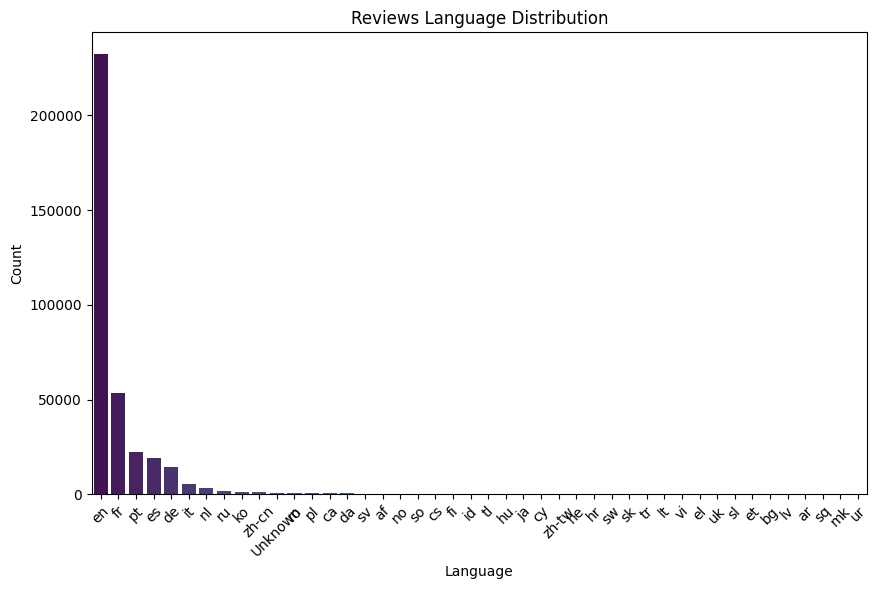

In [31]:
language_counts = train_merged["language_reviews"].value_counts()

# Sort the language counts
language_counts = language_counts.sort_values(ascending=False)

# Plot the sorted language counts
plt.figure(figsize=(10, 6))
sns.barplot(x=language_counts.index, y=language_counts.values, palette="viridis")
plt.title("Reviews Language Distribution")
plt.xlabel("Language")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [32]:
train_merged["language_reviews"].unique()

array(['en', 'cy', 'de', 'fr', 'es', 'pt', 'ru', 'nl', 'it', 'ko',
       'zh-cn', 'he', 'Unknown', 'id', 'pl', 'no', 'so', 'da', 'sq', 'ro',
       'ca', 'hr', 'ja', 'zh-tw', 'tl', 'cs', 'ar', 'af', 'sk', 'sv',
       'hu', 'el', 'sl', 'fi', 'et', 'sw', 'vi', 'lv', 'uk', 'lt', 'tr',
       'bg', 'mk', 'ur'], dtype=object)

C:\Users\TCastilho\AppData\Local\Temp\ipykernel_16480\1052306786.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=language_counts.index, y=language_counts.values, palette="viridis")


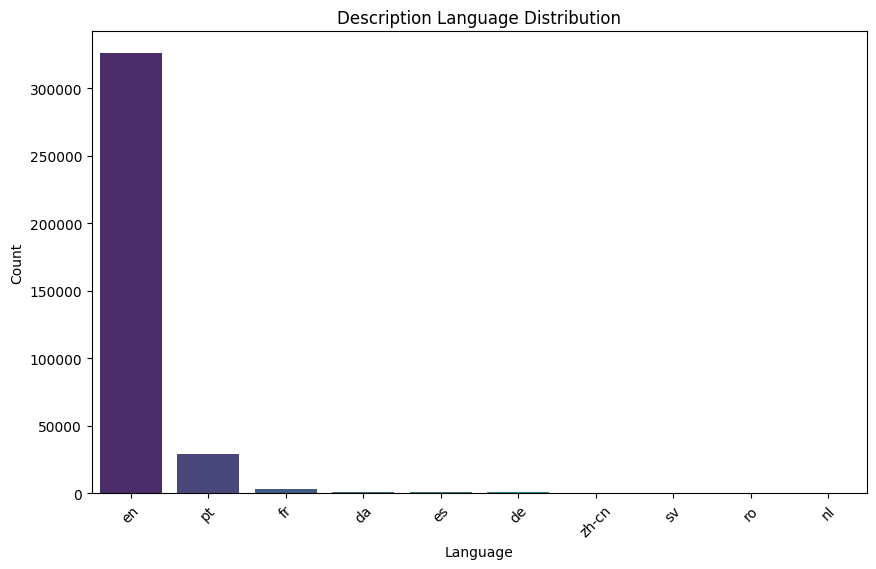

In [33]:
language_counts = train_merged["language_description"].value_counts()

# Sort the language counts
language_counts = language_counts.sort_values(ascending=False)

# Plot the sorted language counts
plt.figure(figsize=(10, 6))
sns.barplot(x=language_counts.index, y=language_counts.values, palette="viridis")
plt.title("Description Language Distribution")
plt.xlabel("Language")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [34]:
train_merged["language_description"].unique()

array(['en', 'fr', 'pt', 'es', 'de', 'da', 'sv', 'ro', 'zh-cn', 'nl'],
      dtype=object)

**Listed vs Unlisted**

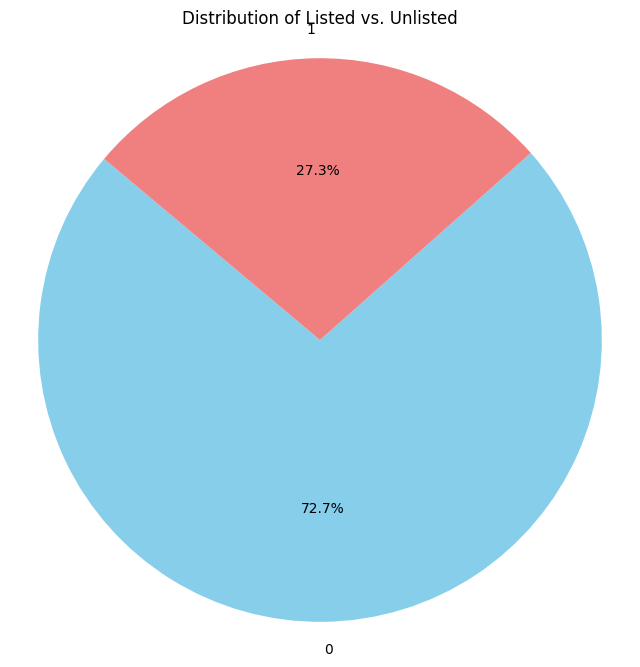

In [35]:
unlisted_counts = train['unlisted'].value_counts()

# Plotting the pie chart for the 'unlisted' column
plt.figure(figsize=(8, 8))
plt.pie(unlisted_counts, labels=unlisted_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Listed vs. Unlisted')
plt.axis('equal')  
plt.show()

**Word count**

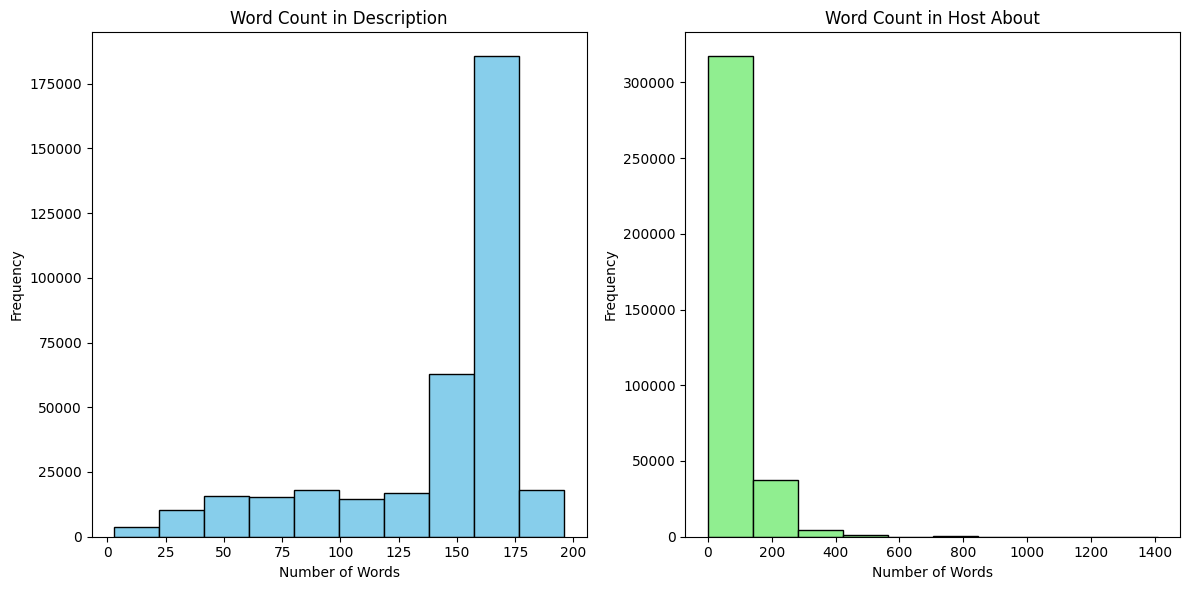

In [36]:
def count_words(text):
    if isinstance(text, str):
        return len(text.split())
    else:
        return np.nan  # or any other appropriate value for missing data

# Apply word count function to each column
train_merged['description_word_count'] = train_merged['description'].apply(count_words)
train_merged['host_about_word_count'] = train_merged['host_about'].apply(count_words)

# Plot histograms
plt.figure(figsize=(12, 6))

# Histogram for description word count
plt.subplot(1, 2, 1)
plt.hist(train_merged['description_word_count'], bins=10, color='skyblue', edgecolor='black')
plt.title('Word Count in Description')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')

# Histogram for host_about word count
plt.subplot(1, 2, 2)
plt.hist(train_merged['host_about_word_count'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Word Count in Host About')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


**Word Frequencies**

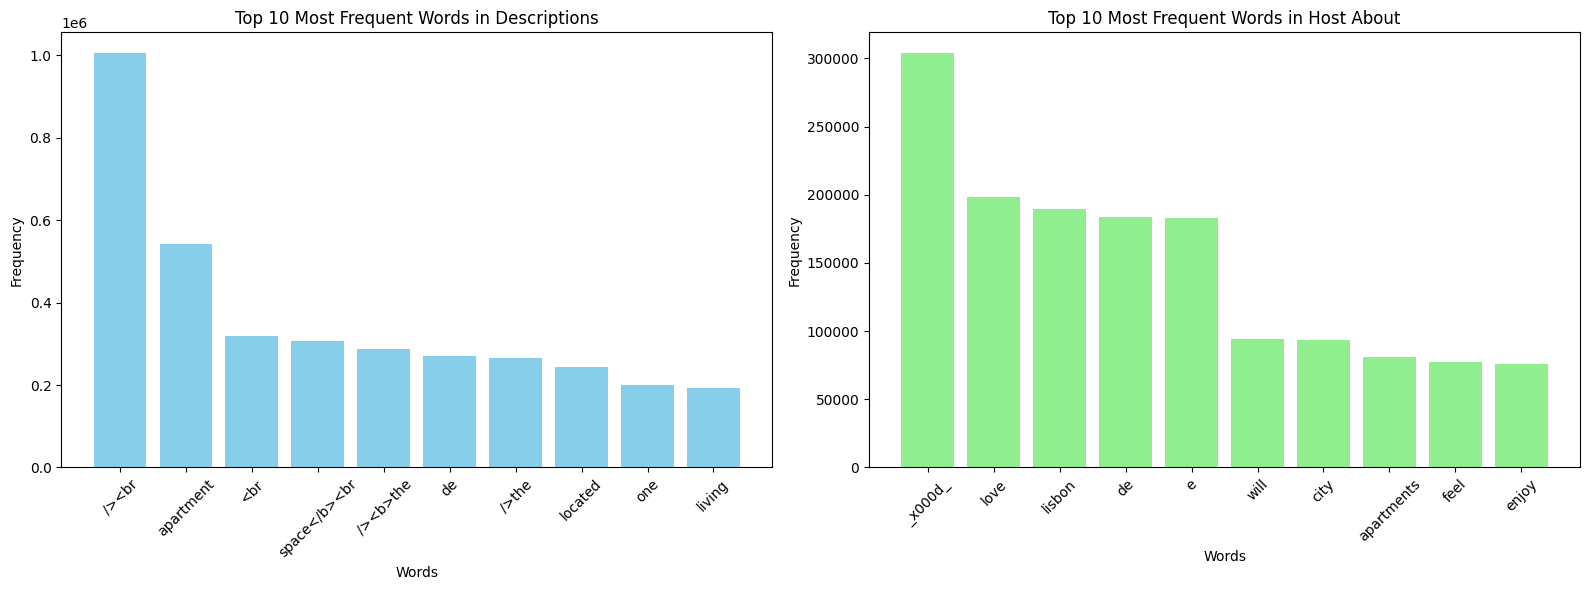

In [37]:
def count_word_frequencies(text_column, num_words=10):
    # Convert non-string values to strings
    text_column = [str(item) for item in text_column]
    
    # Join all text from the specified column into a single string
    all_text = ' '.join(text_column)

    # Convert text to lowercase and split into words
    words = all_text.lower().split()

    # Filter out common stop words (assuming STOPWORDS is defined somewhere)
    words = [word for word in words if word not in STOPWORDS]

    # Count word frequencies
    word_counts = Counter(words)

    # Get the most common words and their frequencies
    top_words = word_counts.most_common(num_words)

    return dict(top_words)
    
# Count word frequencies from the 'description' and 'host_about' columns
top_words_description = count_word_frequencies(train_merged['description'])
top_words_host_about = count_word_frequencies(train_merged['host_about'])

# Plotting the histograms of most frequent words for both columns
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot for 'description' column
axes[0].bar(top_words_description.keys(), top_words_description.values(), color='skyblue')
axes[0].set_title('Top 10 Most Frequent Words in Descriptions')
axes[0].set_xlabel('Words')
axes[0].set_ylabel('Frequency')
axes[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Plot for 'host_about' column
axes[1].bar(top_words_host_about.keys(), top_words_host_about.values(), color='lightgreen')
axes[1].set_title('Top 10 Most Frequent Words in Host About')
axes[1].set_xlabel('Words')
axes[1].set_ylabel('Frequency')
axes[1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Adjust layout and display plots
plt.tight_layout()
plt.show()


In [3]:
def count_word_frequencies(text_column, num_words=10):
    # Convert each comment to a string and concatenate them into a single text
    words = ' '.join(str(comment) for comment in text_column if pd.notna(comment)).lower().split()

    # Filter out common stop words
    words = [word for word in words if word not in STOPWORDS]

    # Count word frequencies
    word_counts = Counter(words)

    # Get the most common words and their frequencies
    top_words = word_counts.most_common(num_words)

    return dict(top_words)

# Count word frequencies from the 'comments' column
top_words_comments = count_word_frequencies(merged_data['comments'])

# Plotting the histogram of most frequent words in 'comments' column
plt.figure(figsize=(10, 6))
plt.bar(top_words_comments.keys(), top_words_comments.values(), color='orange')
plt.title('Top 10 Most Frequent Words in Comments')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

NameError: name 'merged_data' is not defined

**Word Cloud**

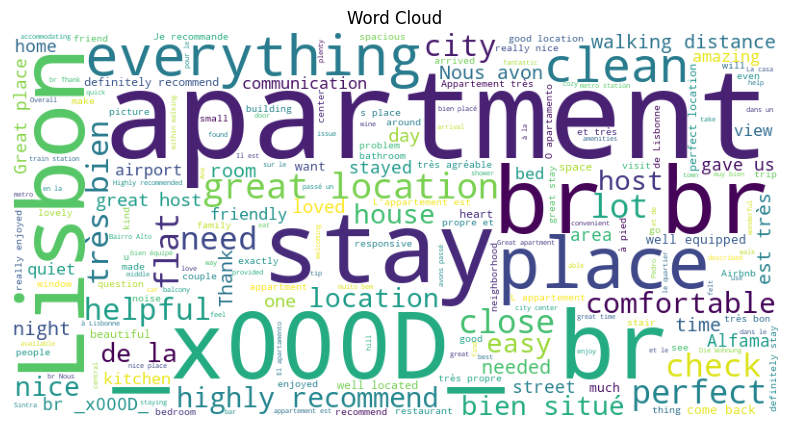

In [38]:
# Joining all the reviews into a single string
all_reviews = ' '.join(train_merged['comments'])
    
# Create WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_reviews)

# Plotting the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Word Cloud')
plt.show()


## 3. Pre-Process

### 3.1 Emoji Treatment

The demojize() function takes a string as input and returns the string with the Unicode characters replaced by their corresponding emoji names. For example, if you pass the string “😀” to the demojize() function, it will return the string “smiley face”. https://codeforgeek.com/python-emoji-module/ emoji for python By default, the language is English (language='en') but also supported languages are:

Spanish ('es')

Portuguese ('pt')

Italian ('it')

French ('fr')

German ('de')

Farsi/Persian ('fa')

Indonesian ('id')

Simplified Chinese ('zh')

Japanese ('ja')

Korean ('ko')

Russian ('ru')

Arabic ('ar')

Turkish ('tr')

In [39]:
# Function to check for emojis
def has_emojis(text):
    if pd.isnull(text):
        return False
    return emoji.emoji_count(str(text)) > 0

# Function to convert emojis to text
def convert_emojis_to_text(dataframe, column_text, column_language):
    dataframe_copy = dataframe.copy()

    def convert_text(text, language):
        if has_emojis(text):
            try:
                return emoji.demojize(text, language=language)
            except:
                return emoji.demojize(text, language='en')
        else:
            return text

    # Apply the conversion to each row
    dataframe_copy[column_text] = dataframe_copy.apply(
        lambda row: convert_text(row[column_text], row[column_language]), axis=1
    )
    
    return dataframe_copy

In [40]:
train_merged_demojized = convert_emojis_to_text(train_merged, 'comments', 'language_reviews')

In [41]:
train_merged_demojized = convert_emojis_to_text(train_merged_demojized, 'description', 'language_description')

In [42]:
test_merged_demojized = convert_emojis_to_text(test_merged, 'comments', 'language_reviews')

In [43]:
test_merged_demojized = convert_emojis_to_text(test_merged_demojized, 'description', 'language_description')

**Checking if there still are emojis**

In [44]:
def print_comments_with_emojis(dataframe, column_text):
    with_emojis = dataframe[dataframe[column_text].apply(has_emojis)]
    print("Comments with emojis after processing:")
    for index, row in with_emojis.iterrows():
        print(f"Index {index}: {row[column_text]}")

In [45]:
print_comments_with_emojis(train_merged_demojized, 'comments')

Comments with emojis after processing:
Index 432: 👍
Index 822: 👍
Index 1033: Wspaniałe miejsce! <br/><br/>Gospodarz, który nas obsługiwał był niezwykle uprzejmy i pomocny. Gdy potrzebowaliśmy pomocy w nocy od razu się z nami skontaktował i pomógł nam natychmiast. Mieszkanie jest nowe, czyste, schludne, a okolica urokliwa i autentyczna. Do Lizbony centralnej jest dosłownie 30 minut spacerem. Jeśli planujesz urlop w Lizbonie, koniecznie rozważ tę ofertę, bo odpoczniesz i poczujesz się zaopiekowany. <br/><br/>Dziękujemy jeszcze raz za gościnę! 🥰
Index 2370: Good👌
Index 3117: Amazing 10/10😇
Index 5268: ♥️
Index 6047: 💚
Index 6130: 👍
Index 7052: Bardzo komfortowe mieszkanie . Ładne pokoje , komfortowe łazienki . Zlokalizowane  w cichej okolicy , blisko sklepiki lokalne .<br/>Bezproblemowe zameldowanie.  Do  centrum  kilka kroków, kilka schodków i jesteś na placu Rossio i na placu Martim Monitz  z którego rusza  słynny tramwaj 28!! Niedaleko Elevador da Lavra który  pomoże  zmęczonym dostać 

In [46]:
print_comments_with_emojis(train_merged_demojized, 'description')

Comments with emojis after processing:


We still have a very small percentage of emojis remaining after running the conversion function, it might be due to several factors such as unsupported emojis, non-standard emoji representations, or limitations in the emoji library. In our to prevent data leakage our decisions will be based on training data, and the test data is processed using the same rules established from the training data.

Based on the training set, we created a dictionary mapping emojis to their textual representations. Any emoji not found in the custom dictionary will be replaced with a generic placeholder :emoji:

textual representations can be found here: https://www.w3schools.com/charsets/ref_emoji_smileys.asp

https://www.geeksforgeeks.org/convert-emoji-into-text-in-python/

In [47]:
remaining_emoji_dict = {
    '💥': ':collision:',
    '🤭': ':face_with_hand_over_mouth:',
    '☺️': ':white_smiling_face:',
    '🤩': ':star-struck:',
    '💪🏽': ':flexed_biceps_dark_skin_tone:',
    '👍': ':thumbs_up:',
    '⭐': ':star:',
    '😊': ':smiling_face_with_smiling_eyes:',
    '👌': ':ok_hand:',
    '👌🏼': ':ok_hand::light_skin_tone:',
    '👍🏻': ':thumbs_up_light_skin_tone:',
    '👍🏽': ':thumbs_up_medium-dark_skin_tone:',
    '😘': ':face_blowing_a_kiss:',
    '🤗': ':hugging_face:',
    '😉': ':winking_face:',
    '🌟': ':glowing_star:',
    '🙂': ':slightly_smiling_face:',
    '😱': ':face_screaming_in_fear:',
    '😃': ':grinning_face_with_big_eyes:',
    '❤️': ':heart:',
    '🥰': ':smiling_face_with_hearts:',
    '😇':'smiling_face_with_halo:',
    '🤙🏼': ":call_me_hand_medium-light_skin_tone:",
    '🤙': ":call_me_hand:",
    '👏': ':clapping_hands:',
    '👏🏼': ':clapping_hands::light_skin_tone:',
    '💚': ':green_heart:',
    '🙂': ':slightly_smiling_face:',
    '🔝': ':top_arrow:',
    '👌🏽': ':ok_hand::medium_skin_tone:',
    '😁': ':beaming_face_with_smiling_eyes:',
    '😂': ':face_with_tears_of_joy:',
    '🇵🇹': ':flag_Portugal:',
    '😍': ':smiling_face_with_heart-eyes:',
    '✨': ':sparkles:',
    '🙏🏻': ':folded_hands::light_skin_tone:',
    '⭐': ':star:',
    '😏': ':smirking_face:',
    '😋': ':face_savoring_food:',
    '🐝': ':honeybee:',
    '😎': ':smiling_face_with_sunglasses:',
    '💯': ':hundred_points:',
    '🎇': ':sparkler:',
    '🖤': ':black_heart:',
    '😌': ':relieved_face:',
    '🐈': ':cat:',
    '🎈': ':balons:',
    '💕': ':two_hearts:',
    '🚀': ':rocket:',
    '🌞': ':sun_with_face:',
    '🍋': ':lemon:',
    '😜':':stuck_out_tongue_winking_eye:',
    '🪨': ':rock:',
    '✌️': ':victory_hand:',
    '🔑': ':key:',
    '😃': ':grinning_face_with_big_eyes:',
    '😀':':grinning_face:',
    '✔️':':check_mark:',
    '🉐':':Japanese_acceptable_button:',
    '🤪':':zany_face:',
    '😆': ':grinning_squinting_face:',
    '🌅': ':sunrise:',
    '🌸': ':cherry_blossom:',
    '🦫': ':beaver:',
    '🎷': ':saxophone:',
    '🔥':':fire:',
    '🐐':':goat:',
    '🤝':':handshake:',
    '☹️':':frowning_face:',
    '☀️':':sun:',
    '🌱': ':seedling:',
    '✅': ':white_heavy_check_mark:',
    '🌹': ':rose:',
    '🙈': ':see-no-evil_monkey:',
    '💗': ':growing_heart:',
    '🏖️': ':beach:',
    '👌🏾': ':ok_hand::medium-dark_skin_tone:',
    '♥️': ':heart_suit:',
    '❤️': ':red_heart:',
    '🙌🏻':':raising_hands::light_skin_tone:',
    '🙌🏾':':raising_hands::medium-dark_skin_tone:',
    '☔':':umbrella_with_rain_drops:',
    '🇧🇪':':flag_Belgium:',
    '👎🏽':':thumbs_down::medium_skin_tone:',
    '👍🏼':':thumbs_up::medium-light_skin_tone:',
    '🤨':':face_with_raised_eyebrow:',
    '😭':':loudly_crying_face:',
    '👍🏾':':thumbs_up::medium-dark_skin_tone:',
    '🤟🏻':':love-you_gesture::light_skin_tone:',
    '🙁':':slightly_frowning_face:',
    '🤣':':rolling_on_the_floor_laughing:',
    '👌🏿':':ok_hand::dark_skin_tone:',
    '🇩🇰':':flag_Denmark:',
    '❣️':':heavy_heart_exclamation_mark_ornament:',   
}


In [48]:
# Define a function to check if a text contains any emojis
def has_emojis(text):
    return any(emoji.is_emoji(char) for char in text)

# Define a function to replace the remaining emojis using a custom dictionary
def custom_replace_remaining_emojis(text, emoji_dict):
    for emj, desc in emoji_dict.items():
        text = text.replace(emj, desc)
    return text

# Define a function to replace any unknown emojis with a placeholder
def replace_unknown_emojis(text):
    return emoji.replace_emoji(text, replace=":emoji:")

# Define a function to process remaining emojis in the dataframe
def process_remaining_emojis(dataframe, column_text, emoji_dict):
    dataframe_copy = dataframe.copy()

    def convert_text_with_remaining_dict(text):
        if has_emojis(text):
            text = custom_replace_remaining_emojis(text, emoji_dict)
            text = replace_unknown_emojis(text)
            return text
        else:
            return text

    dataframe_copy[column_text] = dataframe_copy[column_text].apply(convert_text_with_remaining_dict)
    return dataframe_copy

In [49]:
train_merged_demojized = process_remaining_emojis(train_merged_demojized, 'comments', remaining_emoji_dict)

In [50]:
train_merged_demojized = process_remaining_emojis(train_merged_demojized, 'description', remaining_emoji_dict)

In [51]:
test_merged_demojized = process_remaining_emojis(test_merged_demojized, 'comments', remaining_emoji_dict)

In [52]:
test_merged_demojized = process_remaining_emojis(test_merged_demojized, 'description', remaining_emoji_dict)

In [53]:
def print_comments_with_emojis(dataframe, column_text):
    with_emojis = dataframe[dataframe[column_text].apply(has_emojis)]
    print("Comments with emojis after processing:")
    for index, row in with_emojis.iterrows():
        print(f"Index {index}: {row[column_text]}")

print_comments_with_emojis(train_merged_demojized, 'comments')
print_comments_with_emojis(train_merged_demojized, 'description')

Comments with emojis after processing:
Comments with emojis after processing:


### 3.2.1 Language Problem 

In [54]:
language_counts = (train_merged_demojized["language_description"].value_counts())


total_entries = len(train_merged_demojized)
language_percentages = (language_counts / total_entries) * 100

print("\nLanguage description Percentages:")
print(language_percentages)


Language description Percentages:
language_description
en       90.238884
pt        8.003334
fr        0.878337
da        0.367451
es        0.262227
de        0.230383
zh-cn     0.017445
sv        0.001108
ro        0.000554
nl        0.000277
Name: count, dtype: float64


In [55]:
language_counts = (train_merged_demojized["language_reviews"].value_counts())


total_entries = len(train_merged_demojized)
language_percentages = (language_counts / total_entries) * 100

print("\nLanguage description Percentages:")
print(language_percentages)


Language description Percentages:
language_reviews
en         64.321296
fr         14.752296
pt          6.212324
es          5.322080
de          3.933133
it          1.572810
nl          0.988545
ru          0.416462
ko          0.405386
zh-cn       0.286872
Unknown     0.241460
ro          0.220415
pl          0.162819
ca          0.158942
da          0.127099
sv          0.103839
af          0.094147
no          0.085009
so          0.077533
cs          0.061196
fi          0.055104
id          0.045412
tl          0.041535
hu          0.037659
ja          0.030182
cy          0.029352
zh-tw       0.026306
he          0.024921
hr          0.022152
sw          0.022152
sk          0.019660
tr          0.017999
lt          0.016337
el          0.013568
vi          0.013568
uk          0.012184
sl          0.010245
et          0.005815
bg          0.004154
lv          0.002769
ar          0.002492
sq          0.002215
mk          0.000277
ur          0.000277
Name: count, dtype: floa

- The Descriptions of the airbnb are mainly **99%** written either on english or potguese.
- The Reviews are written in many languages, but we will consider the **top 7** (**97%**):
    - en : English
    - fr : French
    - pt : Portuguese
    - es : Spanish
    - de : German
    - it : Italian
    - nl : Dutch


**Dropping the other rows**

In [56]:
# Get the initial number of rows
initial_row_count = len(train_merged_demojized)

# Define the values to keep
valid_languages = ['en', 'pt', 'fr']

# Filter the DataFrame
train_merged_demojized = train_merged_demojized[train_merged_demojized['language_description'].isin(valid_languages)]

# Get the number of rows after filtering
filtered_row_count = len(train_merged_demojized)

# Calculate the percentage of rows dropped
rows_dropped = initial_row_count - filtered_row_count
percentage_dropped = (rows_dropped / initial_row_count) * 100

# Display the filtered DataFrame and the percentage of rows dropped
print("Filtered DataFrame:")
print(f"\nPercentage of rows dropped: {percentage_dropped:.2f}%")


Filtered DataFrame:

Percentage of rows dropped: 0.88%


In [57]:
# Define the values to keep
valid_languages = ['en', 'pt', 'fr', 'es', 'de', 'it', 'nl']

# Filter the DataFrame
train_merged_demojized = train_merged_demojized[train_merged_demojized['language_reviews'].isin(valid_languages)]

# Get the number of rows after filtering
filtered_row_count = len(train_merged_demojized)

# Calculate the percentage of rows dropped
rows_dropped = initial_row_count - filtered_row_count
percentage_dropped = (rows_dropped / initial_row_count) * 100

# Display the filtered DataFrame and the percentage of rows dropped
print("Filtered DataFrame:")
print(f"\nPercentage of rows dropped: {percentage_dropped:.2f}%")


Filtered DataFrame:

Percentage of rows dropped: 3.74%


In [58]:
number_of_updated_houseIDs = train_merged_demojized['houseID'].nunique()
print("Number of original houseIDs:", number_of_original_houseIDs)
print("Number of updated houseIDs:", number_of_updated_houseIDs)

Number of original houseIDs: 4245
Number of updated houseIDs: 4177


In [59]:
# Export the dataset to a CSV file
train_merged_demojized.to_csv('train_merged_demojized.csv', index=True)
test_merged_demojized.to_csv('test_merged_demojized.csv', index=True)

In [60]:
#load the CSVs
train_merged_demojized = pd.read_csv("train_merged_demojized.csv", index_col='reviewID')
test_merged_demojized = pd.read_csv("test_merged_demojized.csv", index_col='reviewID')

### 3.2.2 Translating rows to english

We attempted to translate all the rows that weren't in English, but encountered too many bugs and errors in the process. Additionally, this task was very time-consuming, so we concluded that it probably wasn't a good idea.

### 3.3 Cleaning Data

In [61]:
# Initialize English lemmatizer
lemma = WordNetLemmatizer()

# Define stopwords for all languages
stopwords_dict = {
    'en': set(stopwords.words('english')),
    'fr': set(stopwords.words('french')),
    'de': set(stopwords.words('german')),
    'es': set(stopwords.words('spanish')),
    'pt': set(stopwords.words('portuguese')),
    'it': set(stopwords.words('italian')),
    'nl': set(stopwords.words('dutch'))
}

# Define stemmers for all languages
stemmers_dict = {
    'en': SnowballStemmer('english'),
    'fr': SnowballStemmer('french'),
    'pt': SnowballStemmer('portuguese'),
    'es': SnowballStemmer('spanish'),
    'de': SnowballStemmer('german'),
    'it': SnowballStemmer('italian'),
    'nl': SnowballStemmer('dutch')
}

# Define accent mapping dictionary
accent_mapping = {
    'à': 'a', 'á': 'a', 'â': 'a', 'ã': 'a', 'ä': 'a', 'å': 'a', 'æ': 'ae', 'ā': 'a',
    'è': 'e', 'é': 'e', 'ê': 'e', 'ë': 'e', 'ē': 'e',
    'ì': 'i', 'í': 'i', 'î': 'i', 'ï': 'i',
    'ò': 'o', 'ó': 'o', 'ô': 'o', 'õ': 'o', 'ö': 'o', 'ø': 'o', 'œ': 'oe',
    'ù': 'u', 'ú': 'u', 'û': 'u', 'ü': 'u', 'ū': 'u', 'ů': 'u',
    'ç': 'c',
    'ñ': 'n',
    'ś': 's', 'š': 's', 'ß': 'ss',
    'ź': 'z', 'ż': 'z', 'ž': 'z'
}

# Function to remove accents
def remove_accents(text):
    modified_text = ""
    for char in text:
        if char in accent_mapping:
            modified_text += accent_mapping[char]
        else:
            modified_text += char
    return modified_text

# Function to clean text
def clean_text(text, lang, lemmatize=True, stem=True):
    # Remove punctuation
    text = ''.join([char if char not in string.punctuation else ' ' for char in text])
    
    # Lowercase text
    text = text.lower()
    
    # Remove unnecessary tags and all non-alphabetic characters except '#' and specified HTML tags
    text = re.sub(r'<[^>]*>', ' ', text)    # Removes all HTML tags
    
    # Remove accents
    text = remove_accents(text)


    
    # Replace numbers with #NUMBER while preserving #
    #text = re.sub(r'(?<!#)\b\d+\b(?!#)', '#NUMBER', text)

    # Remove numbers and #
    text = re.sub(r'\d+', ' ', text)  # Remove numbers
    text = text.replace('#', ' ')  # Remove '#'


    
    # Remove standalone occurrences of 'br' and 'b' while preserving them in words
    text = re.sub(r'\b(br|b)\b', ' ', text)
    
    # Remove non-alphabetic characters except '#'
    text = re.sub(r'[^a-zA-Z# ]+', ' ', text)
    
    # Replace multiple spaces with a single space
    text = re.sub(r'\s+', ' ', text).strip()
    
    # Tokenize and remove stopwords
    tokens = [word for word in text.split() if word not in stopwords_dict.get(lang, set())]
    
    # Lemmatize
    if lemmatize and lang == 'en':
        text = " ".join(lemma.lemmatize(word) for word in tokens)
    else:
        text = " ".join(tokens)
    
    # Stem, skipping tokens starting with '#'
    if stem and lang in stemmers_dict:
        stemmer = stemmers_dict[lang]
        stemmed_tokens = []
        for word in text.split():
            if word.startswith('#'):
                stemmed_tokens.append(word)
            else:
                stemmed_tokens.append(stemmer.stem(word))
        text = " ".join(stemmed_tokens)
    
    return text

**Test function**

In [62]:
# Testing the function with examples
examples = [
    ("Hello! This is a test <br> text with <b>HTML</b> tags, numbers like 123, and accented characters like é and ñ.", 'en'),
    ("Bonjour! Ceci est un test de <br> texte avec des <b>balises HTML</b>, des nombres comme 123, et des caractères accentués comme é et ç.", 'fr'),
    ("Hallo! Dies ist ein Test <br> Text mit <b>HTML</b> Tags, Zahlen wie 123, und akzentuierte Zeichen wie ä und ß.", 'de'),
    ("¡Hola! Este es un <br> texto de prueba con <b>etiquetas HTML</b>, números como 123, y caracteres acentuados como ñ y á.", 'es'),
    ("Ciao! Questo è un <br> testo di prova con <b>tag HTML</b>, numeri come 123, e caratteri accentati come à e è.", 'it'),
    ("Olá! Este é um <br> texto de teste com <b>etiquetas HTML</b>, números como 123, e caracteres acentuados como é e õ.", 'pt'),
    ("Hallo! Dit is een <br> testtekst met <b>HTML</b> tags, nummers zoals 123, en geaccentueerde tekens zoals é en ö.", 'nl')
]

for text, lang in examples:
    cleaned_text = clean_text(text, lang)
    print(f"Original text: {text}")
    print(f"Cleaned text: {cleaned_text}\n")


Original text: Hello! This is a test <br> text with <b>HTML</b> tags, numbers like 123, and accented characters like é and ñ.
Cleaned text: hello test text html tag number like accent charact like e n

Original text: Bonjour! Ceci est un test de <br> texte avec des <b>balises HTML</b>, des nombres comme 123, et des caractères accentués comme é et ç.
Cleaned text: bonjour cec test text balis html nombr comm caracter accentu comm e

Original text: Hallo! Dies ist ein Test <br> Text mit <b>HTML</b> Tags, Zahlen wie 123, und akzentuierte Zeichen wie ä und ß.
Cleaned text: hallo test text html tag zahl akzentuiert zeich a ss

Original text: ¡Hola! Este es un <br> texto de prueba con <b>etiquetas HTML</b>, números como 123, y caracteres acentuados como ñ y á.
Cleaned text: hol text prueb etiquet html numer caracter acentu n

Original text: Ciao! Questo è un <br> testo di prova con <b>tag HTML</b>, numeri come 123, e caratteri accentati come à e è.
Cleaned text: cia test prov tag html numer c

In [63]:
texto = clean_text("eu amo o brasil","pt",lemmatize=True,stem=True)
print(texto)

amo brasil


In [64]:
# Assuming train_merged is your DataFrame
total_rows = len(train_merged_demojized)
with tqdm(total=total_rows) as pbar:
    # Apply clean_text with progress bar to each row
    def apply_and_track_progress(row):
        pbar.update(1)
        return clean_text(row['comments'], row['language_reviews'])
        
    train_merged_demojized['cleaned_comments'] = train_merged_demojized.apply(apply_and_track_progress, axis=1)
    test_merged_demojized['cleaned_comments'] = test_merged_demojized.apply(apply_and_track_progress, axis=1)

389467it [03:40, 1765.71it/s]                                                                                          


In [65]:
train_merged_demojized[['comments', 'language_reviews', 'cleaned_comments']].head(5)

,comments,language_reviews,cleaned_comments
reviewID,,,
0,this is a very cozy and comfortable house to s...,en,cozi comfort hous stay never worri safeti host...
2,"My first hostel experience, and all I have to ...",en,first hostel experi say pretti hard beat place...
3,Das Hostel war neu und deshalb funktionierte a...,de,hostel neu deshalb funktioniert tadellos schne...
4,"It was fine for a dorm, but I think for the pe...",en,fine dorm think peopl stay far le bathroom toi...
5,Our stay in Lisbon Tip Hostel was very good. T...,en,stay lisbon tip hostel good mix room well clea...


In [66]:
# Assuming train_merged is your DataFrame
total_rows = len(train_merged_demojized)
with tqdm(total=total_rows) as pbar:
    # Apply clean_text with progress bar to each row
    def apply_and_track_progress(row):
        pbar.update(1)
        return clean_text(row['description'], row['language_description'])
        
    train_merged_demojized['cleaned_description'] = train_merged_demojized.apply(apply_and_track_progress, axis=1)
    test_merged_demojized['cleaned_description'] = test_merged_demojized.apply(apply_and_track_progress, axis=1)

389467it [10:25, 622.53it/s]                                                                                           


In [67]:
train_merged_demojized[['description', 'language_description', 'cleaned_description']].head(50)

,description,language_description,cleaned_description
reviewID,,,
0,"This is a shared mixed room in our hostel, wit...",en,share mix room hostel share bathroom locat rig...
2,"This is a shared mixed room in our hostel, wit...",en,share mix room hostel share bathroom locat rig...
3,"This is a shared mixed room in our hostel, wit...",en,share mix room hostel share bathroom locat rig...
4,"This is a shared mixed room in our hostel, wit...",en,share mix room hostel share bathroom locat rig...
5,"This is a shared mixed room in our hostel, wit...",en,share mix room hostel share bathroom locat rig...
6,"This is a shared mixed room in our hostel, wit...",en,share mix room hostel share bathroom locat rig...
7,"This is a shared mixed room in our hostel, wit...",en,share mix room hostel share bathroom locat rig...
8,"This is a shared mixed room in our hostel, wit...",en,share mix room hostel share bathroom locat rig...
9,"This is a shared mixed room in our hostel, wit...",en,share mix room hostel share bathroom locat rig...


In [69]:
# Export the dataset to a CSV file
train_merged_cleaned=train_merged_demojized
train_merged_cleaned.to_csv('train_merged_cleaned.csv', index=True)
test_merged_cleaned=test_merged_demojized
test_merged_cleaned.to_csv('test_merged_cleaned.csv', index=True)

### 3.4 Removing Unnecessary Data

In [70]:
train_merged_cleaned = pd.read_csv("train_merged_cleaned.csv",index_col='reviewID')
test_merged_cleaned = pd.read_csv("test_merged_cleaned.csv",index_col='reviewID')

In [71]:
cleaned_train = train_merged_cleaned.drop(columns=['host_about', 'comments', 'description', 'language_reviews', 'language_description', 'description_word_count', 'host_about_word_count'])
cleaned_test = test_merged_cleaned.drop(columns=['host_about', 'comments', 'description', 'language_reviews', 'language_description'])

Before executing the split, we made the decision to merge all the comments relative to the same house into a new variable named all_comments_cleaned.

In [72]:
# Function to preprocess the DataFrame
def preprocess_comments(df):
    # Ensure that cleaned_comments are strings and handle NaN values
    df['cleaned_comments'] = df['cleaned_comments'].astype(str).fillna('')

    # Group by houseID and aggregate the comments
    grouped = df.groupby('houseID')['cleaned_comments'].apply(lambda x: ' '.join(x)).reset_index()

    # Rename the aggregated column to 'all_comments_cleaned'
    grouped.rename(columns={'cleaned_comments': 'all_comments_cleaned'}, inplace=True)

    # Merge the grouped data back with the original dataframe on houseID
    preprocessed_df = pd.merge(df.drop(columns='cleaned_comments'), grouped, on='houseID')

    # Drop duplicate rows since the merge might create duplicates
    preprocessed_df = preprocessed_df.drop_duplicates(subset='houseID').reset_index(drop=True)

    # Set houseID as the index
    preprocessed_df.set_index('houseID', inplace=True)
    
    return preprocessed_df

# Preprocess cleaned_train
train_preprocessed = preprocess_comments(cleaned_train)
# Preprocess cleaned_test
test_preprocessed = preprocess_comments(cleaned_test)

### 3.5 Re - Visualizations

**Word Count**

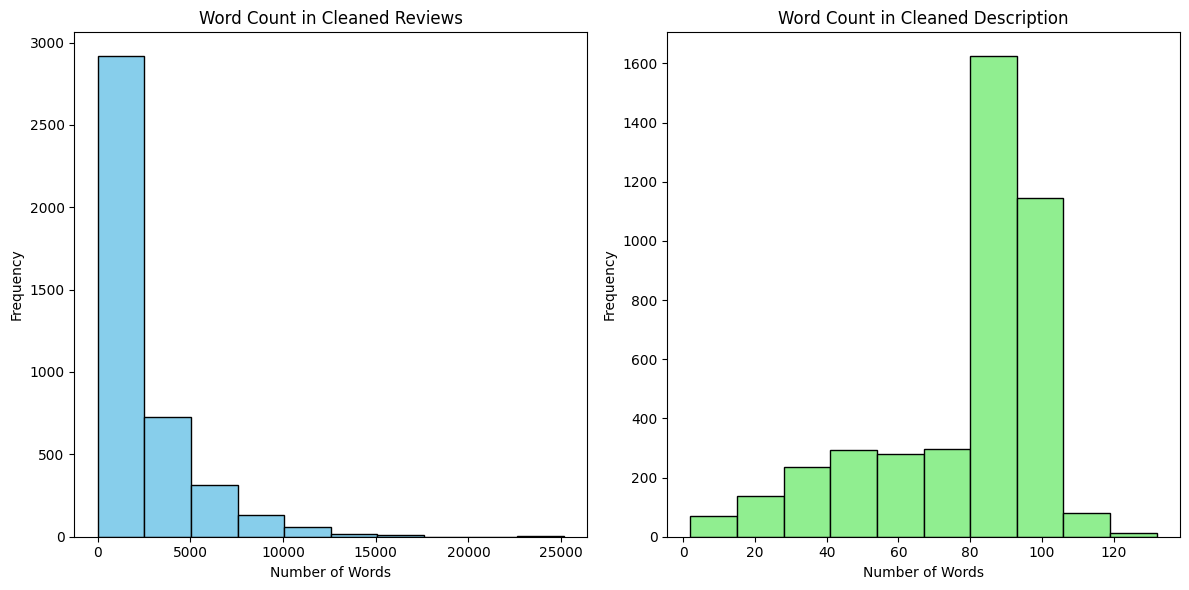

In [77]:
def count_words(text):
    if isinstance(text, str):
        return len(text.split())
    else:
        return np.nan  # or any other appropriate value for missing data

# Apply word count function to each column
train_preprocessed['cleaned_comments_word_count'] = train_preprocessed['all_comments_cleaned'].apply(count_words)
train_preprocessed['cleaned_description_word_count'] = train_preprocessed['cleaned_description'].apply(count_words)

# Plot histograms
plt.figure(figsize=(12, 6))

# Histogram for cleaned_comments_word_count
plt.subplot(1, 2, 1)
plt.hist(train_preprocessed['cleaned_comments_word_count'], bins=10, color='skyblue', edgecolor='black')
plt.title('Word Count in Cleaned Reviews')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')

# Histogram for cleaned_description_word_count
plt.subplot(1, 2, 2)
plt.hist(train_preprocessed['cleaned_description_word_count'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Word Count in Cleaned Description')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


**Word Frequencies**

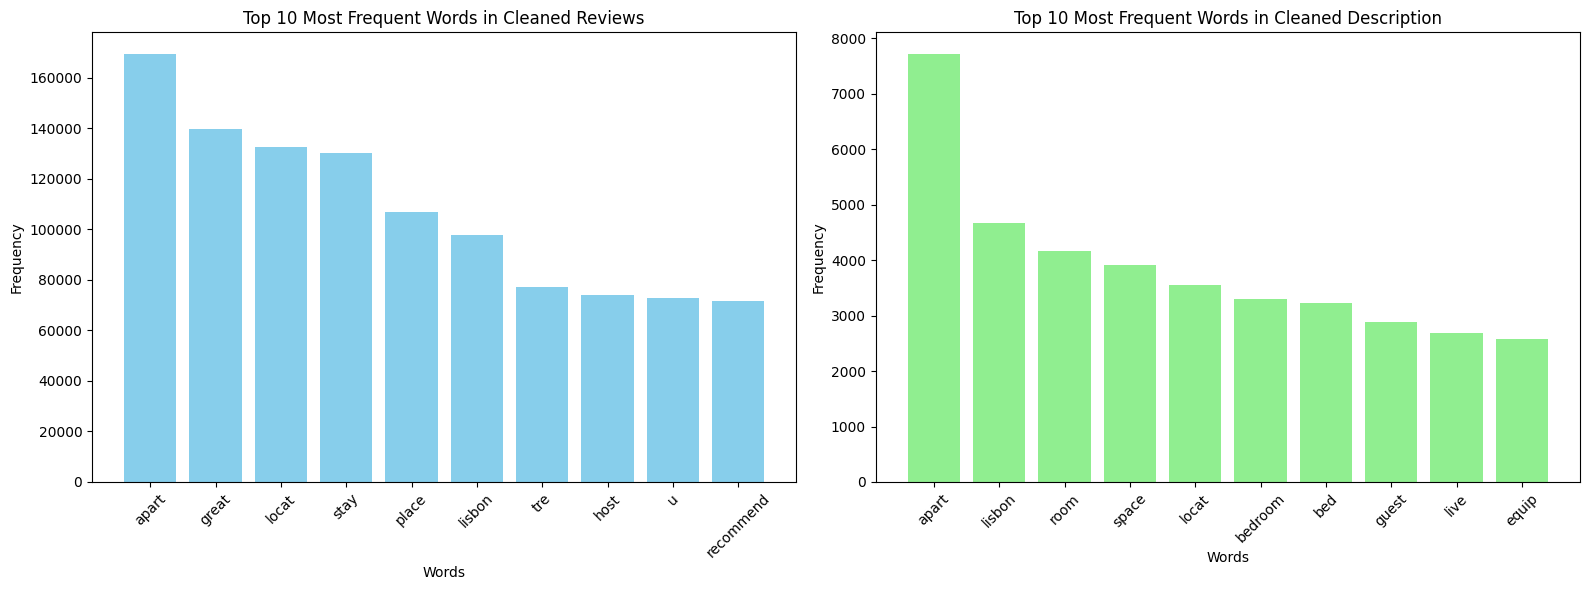

In [78]:
def count_word_frequencies(text_column, num_words=10):
    # Convert non-string values to strings
    text_column = [str(item) for item in text_column]
    
    # Join all text from the specified column into a single string
    all_text = ' '.join(text_column)

    # Convert text to lowercase and split into words
    words = all_text.lower().split()

    # Filter out common stop words (assuming STOPWORDS is defined somewhere)
    words = [word for word in words if word not in STOPWORDS]

    # Count word frequencies
    word_counts = Counter(words)

    # Get the most common words and their frequencies
    top_words = word_counts.most_common(num_words)

    return dict(top_words)

# Apply word count function to each column
top_words_cleaned_comments = count_word_frequencies(train_preprocessed['all_comments_cleaned'])
top_words_cleaned_description = count_word_frequencies(train_preprocessed['cleaned_description'])

# Plotting the histograms of most frequent words for both columns
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot for 'cleaned_comments' column
axes[0].bar(top_words_cleaned_comments.keys(), top_words_cleaned_comments.values(), color='skyblue')
axes[0].set_title('Top 10 Most Frequent Words in Cleaned Reviews')
axes[0].set_xlabel('Words')
axes[0].set_ylabel('Frequency')
axes[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Plot for 'cleaned_description' column
axes[1].bar(top_words_cleaned_description.keys(), top_words_cleaned_description.values(), color='lightgreen')
axes[1].set_title('Top 10 Most Frequent Words in Cleaned Description')
axes[1].set_xlabel('Words')
axes[1].set_ylabel('Frequency')
axes[1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Adjust layout and display plots
plt.tight_layout()
plt.show()


**Word Cloud**

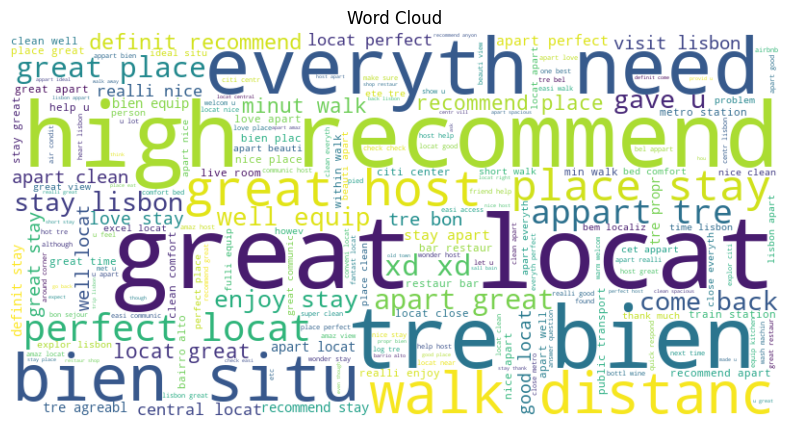

In [79]:
# Convert NaN values to empty strings and then join all the reviews and descriptions into a single string
comments = train_preprocessed['all_comments_cleaned'].fillna('').astype(str)
descriptions = train_preprocessed['cleaned_description'].fillna('').astype(str)
all_reviews_and_descriptions = ' '.join(comments) + ' ' + ' '.join(descriptions)

# Create WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_reviews_and_descriptions)

# Plotting the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud')
plt.show()


### 3.6 Train / Validation Split

In [80]:
# Sort the DataFrame by the index (houseID)
train_preprocessed_sorted = train_preprocessed.sort_index()

# Train-validation split for cleaned_train dataset
X_train, X_val, y_train, y_val = train_test_split(
    train_preprocessed_sorted[['all_comments_cleaned', 'cleaned_description']],
    train_preprocessed_sorted[['unlisted']],
    test_size=0.3,
    random_state=4
)

# Test split for cleaned_test dataset
#X_test = cleaned_test[['cleaned_comments', 'cleaned_description', 'houseID']]
#y_test = cleaned_test[['unlisted', 'houseID']]

**Exporting the split to csv to make sure we always use the same split**

In [4]:
# Exporting datasets to CSV
X_train.to_csv("X_train.csv")
X_val.to_csv("X_val.csv")
#X_test.to_csv("X_test.csv")
y_train.to_csv("y_train.csv")
y_val.to_csv("y_val.csv")
#y_test.to_csv("y_test.csv")

NameError: name 'X_train' is not defined

## 4. Feature Engineering

In this process, we will create various datasets to test with different models later. The primary goal is to combine diverse dataset concepts with different models in hopes of finding a successful combination that performs well in the test split.

**Loading the previously done split**

In [2]:
# Load train-validation split datasets
X_train = pd.read_csv("X_train.csv", index_col=0)
X_val = pd.read_csv("X_val.csv", index_col=0)
#X_test = pd.read_csv("X_test.csv", index_col=0)
y_train = pd.read_csv("y_train.csv", index_col=0)
y_val = pd.read_csv("y_val.csv", index_col=0)
#y_test = pd.read_csv("y_test.csv", index_col=0)

### 4.1 Sentiment Analysis

Here, we will create two datasets: one applying sentiment analysis to comments and descriptions individually, and another combining both for analysis.

#### 4.1.1 Sentiment Analysis applied individually

In [24]:
X_train_sa = X_train.copy()
y_train_sa = y_train.copy()

X_val_sa = X_val.copy()
y_val_sa = y_val.copy()

In [25]:
# Perform sentiment analysis on Comments
X_train_sa['sentiment_comments'] = X_train_sa['all_comments_cleaned'].apply(lambda text: TextBlob(text).sentiment.polarity)
# Classify sentiment into positive, negative, or neutral of Comments
X_train_sa['sentiment_comments_label'] = X_train_sa['sentiment_comments'].apply(lambda score: 'Positive' if score > 0 else 'Negative' if score < 0 else 'Neutral')

# Perform sentiment analysis on Comments
X_val_sa['sentiment_comments'] = X_val_sa['all_comments_cleaned'].apply(lambda text: TextBlob(text).sentiment.polarity)
# Classify sentiment into positive, negative, or neutral of Comments
X_val_sa['sentiment_comments_label'] = X_val_sa['sentiment_comments'].apply(lambda score: 'Positive' if score > 0 else 'Negative' if score < 0 else 'Neutral')


In [26]:
# Perform sentiment analysis on Description
X_train_sa['sentiment_description'] = X_train_sa['cleaned_description'].apply(lambda text: TextBlob(text).sentiment.polarity)
# Classify sentiment into positive, negative, or neutral of Description
X_train_sa['sentiment_description_label'] = X_train_sa['sentiment_description'].apply(lambda score: 'Positive' if score > 0 else 'Negative' if score < 0 else 'Neutral')

# Perform sentiment analysis on Description
X_val_sa['sentiment_description'] = X_val_sa['cleaned_description'].apply(lambda text: TextBlob(text).sentiment.polarity)
# Classify sentiment into positive, negative, or neutral of Description
X_val_sa['sentiment_description_label'] = X_val_sa['sentiment_description'].apply(lambda score: 'Positive' if score > 0 else 'Negative' if score < 0 else 'Neutral')

In [27]:
X_train_sa.head(5)

,all_comments_cleaned,cleaned_description,sentiment_comments,sentiment_comments_label,sentiment_description,sentiment_description_label
houseID,,,,,,
3025,help find place around area apart spacious com...,ola sandr cas joa apaixon vid sempr divert sem...,0.293750,Positive,-0.150000,Negative
2795,nice comfort appart everyth within walk distan...,newli remodel apart histor madragoa neighborho...,0.372651,Positive,0.097523,Positive
1054,appart bien situ belem propr seul point negat ...,beauti duplex hous bedroom doubl bed upper bed...,0.322741,Positive,0.198485,Positive
6132,heberg tre propr coquet bien situ pre centr el...,situat highest seven hill beauti cozi duplex t...,0.315729,Positive,0.357008,Positive
519,perfect experi cascai blanca enthusiast give u...,cascai center minut walk beach locat heart cas...,0.392365,Positive,0.066234,Positive


In [28]:
#COMMENTS
# Grouping sentiment labels and counting occurrences
sentiment_comments_counts = X_train_sa.groupby(['sentiment_comments_label']).size().reset_index(name='count')
sentiment_comments_counts

,sentiment_comments_label,count
0,Negative,9
1,Neutral,29
2,Positive,2885


In [29]:
#Description
sentiment_description_counts = X_train_sa.groupby(['sentiment_description_label']).size().reset_index(name='count')
sentiment_description_counts

,sentiment_description_label,count
0,Negative,265
1,Neutral,82
2,Positive,2576


**But is the description sentiment related with the comments sentiment? Lets Check**

In [30]:
correlation = X_train_sa['sentiment_comments'].corr(X_train_sa['sentiment_description'])
print("Correlation between sentiment_comments and sentiment_description:", correlation)

Correlation between sentiment_comments and sentiment_description: 0.06968795664928927


**Does not look like it has a correlation... so we might drop the description or just merge it with the comments**

Lets see if we merge them, the counts of the sentiment labels change

#### 4.1.2 Sentiment Analysis applied merged

In [31]:
X_train_sa2 = X_train.copy()
y_train_sa2 = y_train.copy()

X_val_sa2 = X_val.copy()
y_val_sa2 = y_val.copy()

In [32]:
# Merge two columns into a new column
X_train_sa2['comments_and_description_cleaned'] = X_train_sa2.apply(lambda row: row['all_comments_cleaned'] + ' ' + row['cleaned_description'], axis=1)

In [33]:
# Perform sentiment analysis on comments_and_description_cleaned
X_train_sa2['sentiment_comments_and_description_cleaned'] = X_train_sa2['comments_and_description_cleaned'].apply(lambda text: TextBlob(text).sentiment.polarity)
# Classify sentiment into positive, negative, or neutral of comments_and_description_cleaned
X_train_sa2['sentiment_comments_and_description_label'] = X_train_sa2['sentiment_comments_and_description_cleaned'].apply(lambda score: 'Positive' if score > 0 else 'Negative' if score < 0 else 'Neutral')

# Perform sentiment analysis on comments_and_description_cleaned
X_val_sa2['sentiment_comments_and_description_cleaned'] = X_train_sa2['comments_and_description_cleaned'].apply(lambda text: TextBlob(text).sentiment.polarity)
# Classify sentiment into positive, negative, or neutral of comments_and_description_cleaned
X_val_sa2['sentiment_comments_and_description_label'] = X_train_sa2['sentiment_comments_and_description_cleaned'].apply(lambda score: 'Positive' if score > 0 else 'Negative' if score < 0 else 'Neutral')


In [34]:
X_train_sa2.head(5)

,all_comments_cleaned,cleaned_description,comments_and_description_cleaned,sentiment_comments_and_description_cleaned,sentiment_comments_and_description_label
houseID,,,,,
3025,help find place around area apart spacious com...,ola sandr cas joa apaixon vid sempr divert sem...,help find place around area apart spacious com...,0.205000,Positive
2795,nice comfort appart everyth within walk distan...,newli remodel apart histor madragoa neighborho...,nice comfort appart everyth within walk distan...,0.364127,Positive
1054,appart bien situ belem propr seul point negat ...,beauti duplex hous bedroom doubl bed upper bed...,appart bien situ belem propr seul point negat ...,0.320059,Positive
6132,heberg tre propr coquet bien situ pre centr el...,situat highest seven hill beauti cozi duplex t...,heberg tre propr coquet bien situ pre centr el...,0.318825,Positive
519,perfect experi cascai blanca enthusiast give u...,cascai center minut walk beach locat heart cas...,perfect experi cascai blanca enthusiast give u...,0.366204,Positive


In [35]:
#Description
sentiment_comments_and_description_label_counts = X_train_sa2.groupby(['sentiment_comments_and_description_label']).size().reset_index(name='count')
sentiment_comments_and_description_label_counts

,sentiment_comments_and_description_label,count
0,Negative,12
1,Neutral,3
2,Positive,2908


**After looking at both tables, we can in fact conclude that sentiment analysis does not look it will be helpfull, so we wont apply it X_val**

### 4.2. TF-IDF

Here, we will create two datasets: one applying Tf-IDF to comments individually, and another combining both comments and description for analysis.

#### 4.2.1 TF-IDF applied only to comments

In [4]:
X_train_tfidf = X_train.copy()
y_train_tfidf = y_train.copy()

X_val_tfidf = X_val.copy()
y_val_tfidf = y_val.copy()

In [5]:
# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, ngram_range=(1, 3))

# max_df=0.8 means that terms occurring in more than 80% of the documents will be ignored
# ngram_range=(1,2) means that the vectorizer will consider both single words (unigrams) and pairs of consecutive words (bigrams) when getting features

# Apply TF-IDF to the all_comments_cleaned in the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train["all_comments_cleaned"])
y_train_tfidf = y_train.copy()

# Apply TF-IDF to the all_comments_cleaned in the validation data
X_val_tfidf = tfidf_vectorizer.fit_transform(X_val["all_comments_cleaned"])
y_val_tfidf = y_val.copy()


In [6]:
X_train_tfidf[0]

<1x5725585 sparse matrix of type '<class 'numpy.float64'>'
	with 437 stored elements in Compressed Sparse Row format>

#### 4.2.2 TF-IDF applied to merged comments and description

In [7]:
X_train_tfidf2 = X_train.copy()
y_train_tfidf2 = y_train.copy()

X_val_tfidf2 = X_val.copy()
y_val_tfidf2 = y_val.copy()

In [9]:
# Merge two columns into a new column
X_train_tfidf2['comments_and_description_cleaned'] = X_train_tfidf2.apply(lambda row: row['all_comments_cleaned'] + ' ' + row['cleaned_description'], axis=1)
X_val_tfidf2['comments_and_description_cleaned'] = X_val_tfidf2.apply(lambda row: row['all_comments_cleaned'] + ' ' + row['cleaned_description'], axis=1)

In [12]:
# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, ngram_range=(1, 3))

# max_df=0.8 means that terms occurring in more than 80% of the documents will be ignored
# ngram_range=(1,2) means that the vectorizer will consider both single words (unigrams) and pairs of consecutive words (bigrams) when getting features

# Apply TF-IDF to the all_comments_cleaned in the training data
X_train_tfidf2 = tfidf_vectorizer.fit_transform(X_train_tfidf2["comments_and_description_cleaned"])
y_train_tfidf2 = y_train.copy()

# Apply TF-IDF to the all_comments_cleaned in the validation data
X_val_tfidf2 = tfidf_vectorizer.fit_transform(X_val_tfidf2["comments_and_description_cleaned"])
y_val_tfidf2 = y_val.copy()


In [13]:
X_train_tfidf2[0]

<1x5894631 sparse matrix of type '<class 'numpy.float64'>'
	with 675 stored elements in Compressed Sparse Row format>

### 4.3. Bag Of Words

Here, we will create two datasets: one applying Tf-IDF to comments individually, and another combining both comments and description for analysis.

**CountVectorizer Parameters**

- **`input`**: Specifies the input format. Can be 'filename', 'file', or 'content'. Default is 'content'.
- **`encoding`**: Specifies the character encoding to use. Default is 'utf-8'.
- **`decode_error`**: Specifies what to do when a byte sequence is not decodable. Options are 'strict', 'ignore', or 'replace'. Default is 'strict'.
- **`strip_accents`**: Removes accents and other diacritics. Can be 'ascii', 'unicode', or None. Default is None.
- **`lowercase`**: Converts all characters to lowercase before tokenizing. Default is True.
- **`preprocessor`**: A custom preprocessing function to apply to each document before tokenization.
- **`tokenizer`**: A custom tokenization function to use instead of the default.
- **`stop_words`**: Removes stop words. Can be a string ('english'), a list of stop words, or None. Default is None.
- **`token_pattern`**: A regular expression denoting what constitutes a “token”. Default is `r'(?u)\b\w\w+\b'`.
- **`ngram_range`**: The lower and upper boundary of the range of n-values for different n-grams to be extracted. Default is (1, 1).
- **`analyzer`**: Determines whether the feature should be made of word or character n-grams. Can be 'word', 'char', or 'char_wb'. Default is 'word'.
- **`max_df`**: Ignore terms that have a document frequency strictly higher than the given threshold. Can be an integer (absolute counts) or a float (proportion of documents). Default is 1.0.
- **`min_df`**: Ignore terms that have a document frequency strictly lower than the given threshold. Can be an integer (absolute counts) or a float (proportion of documents). Default is 1.
- **`max_features`**: If not None, build a vocabulary that only considers the top `max_features` ordered by term frequency across the corpus.
- **`vocabulary`**: A mapping of terms to feature indices. Can be a dictionary or an iterable.
- **`binary`**: If True, all non-zero counts are set to 1. This is useful for binary occurrences rather than counts. Default is False.
- **`dtype`**: The type of the matrix returned by `fit_transform()` or `transform()`. Default is `np.int64`.


#### 4.3.1 BoW applied only to comments

In [3]:
X_train_bow = X_train.copy()
y_train_bow = y_train.copy()

X_val_bow = X_val.copy()
y_val_bow = y_val.copy()

In [4]:
vectorizer = CountVectorizer()

# Fit the vectorizer on the training data and transform the training data into a bag-of-words representation
X_train_bow = vectorizer.fit_transform(X_train_bow['all_comments_cleaned'])

# Convert the training labels to a numpy array
y_train_bow = np.array(y_train_bow)

# Transform the validation data using the already fitted vectorizer
X_val_bow = vectorizer.transform(X_val_bow['all_comments_cleaned'])

# Convert the validation labels to a numpy array
y_val_bow = np.array(y_val_bow)

In [5]:
X_train_bow

<2923x59947 sparse matrix of type '<class 'numpy.int64'>'
	with 2154017 stored elements in Compressed Sparse Row format>

#### 4.3.2 BoW applied to merged comments and description

In [6]:
X_train_bow2 = X_train.copy()
y_train_bow2 = y_train.copy()

X_val_bow2 = X_val.copy()
y_val_bow2 = y_val.copy()

In [7]:
# Merge two columns into a new column
X_train_bow2['comments_and_description_cleaned'] = X_train_bow2.apply(lambda row: row['all_comments_cleaned'] + ' ' + row['cleaned_description'], axis=1)
X_val_bow2['comments_and_description_cleaned'] = X_val_bow2.apply(lambda row: row['all_comments_cleaned'] + ' ' + row['cleaned_description'], axis=1)

In [8]:
vectorizer = CountVectorizer()

# Fit the vectorizer on the training data and transform the training data into a bag-of-words representation
X_train_bow2 = vectorizer.fit_transform(X_train_bow2['comments_and_description_cleaned'])

# Convert the training labels to a numpy array
y_train_bow2 = np.array(y_train_bow2)

# Transform the validation data using the already fitted vectorizer
X_val_bow2 = vectorizer.transform(X_val_bow2['comments_and_description_cleaned'])

# Convert the validation labels to a numpy array
y_val_bow2 = np.array(y_val_bow2)

In [9]:
X_train_bow2

<2923x61333 sparse matrix of type '<class 'numpy.int64'>'
	with 2250996 stored elements in Compressed Sparse Row format>

### 4.4. Word Embeddings (Notebook 3)

#### 4.4.1 GloVe 

In [19]:
X_train_glove = X_train.copy()
y_train_glove = y_train.copy()

X_val_glove = X_val.copy()
y_val_glove = y_val.copy()

In [7]:
model_glove = api.load("glove-wiki-gigaword-50")

[==================================================] 100.0% 66.0/66.0MB downloaded


In [20]:
def get_word_embeddings_glove(text):
    word_glove_embeddings = []
    for word in text.split():
    try:
        word_embedding = model_glove.get_vector(word)
    except KeyError:
        word_embedding = [0.0] * model_glove.vector_size

    word_glove_embeddings.append(word_embedding)

    word_glove_embeddings = np.array(word_glove_embeddings)
    reshaped = word_glove_embeddings.reshape(1, -1)


    return reshaped

#### 4.4.1.1 GloVe applied to comments

In [21]:
# Perform GloVe on Comments
X_train_glove['all_comments_cleaned'] = X_train_glove['all_comments_cleaned'].apply(get_word_embeddings_glove)

# Perform GloVe on Comments
X_val_glove['all_comments_cleaned'] = X_val_glove['all_comments_cleaned'].apply(get_word_embeddings_glove)


#### 4.4.1.2 GloVe applied to merged comments and description

In [22]:
X_train_glove2 = X_train.copy()
y_train_glove2 = y_train.copy()

X_val_glove2 = X_val.copy()
y_val_glove2 = y_val.copy()

In [24]:
# Merge two columns into a new column
X_train_glove2['comments_and_description_cleaned'] = X_train_glove2.apply(lambda row: row['all_comments_cleaned'] + ' ' + row['cleaned_description'], axis=1)
X_val_glove2['comments_and_description_cleaned'] = X_val_glove2.apply(lambda row: row['all_comments_cleaned'] + ' ' + row['cleaned_description'], axis=1)

In [27]:
# Perform GloVe on merged comments and description
X_train_glove2['comments_and_description_cleaned'] = X_train_glove2['comments_and_description_cleaned'].apply(get_word_embeddings_glove)

# Perform GloVe on merged comments and description
X_val_glove2['comments_and_description_cleaned'] = X_val_glove2['comments_and_description_cleaned'].apply(get_word_embeddings_glove)

#### 4.4.2 Word2Vec 

In [41]:
X_train_word2vec = X_train.copy()
y_train_word2vec = y_train.copy()

X_val_word2vec = X_val.copy()
y_val_word2vec = y_val.copy()

In [32]:
model_word2vec = api.load("word2vec-google-news-300")

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [42]:
def get_word_embeddings_word2vec(text):
    word2vec_embeddings = []
    for word in text.split():
        try:
            word_embedding = model_word2vec.get_vector(word)
        except KeyError:
            word_embedding = [0.0] * model_word2vec.vector_size

        word2vec_embeddings.append(word_embedding)

    word2vec_embeddings = np.array(word2vec_embeddings, dtype=np.float32)
    reshaped = word2vec_embeddings.reshape(1, -1)

    return reshaped

#### 4.4.2.1 Word2Vec applied to comments

In [43]:
# Perform Word2Vec on Comments
X_train_word2vec['all_comments_cleaned'] = X_train_word2vec['all_comments_cleaned'].apply(get_word_embeddings_word2vec)

# Perform Word2Vec on Comments
X_val_word2vec['all_comments_cleaned'] = X_val_word2vec['all_comments_cleaned'].apply(get_word_embeddings_word2vec)


#### 4.4.2.2 Word2Vec applied to merged comments and description

In [45]:
X_train_word2vec2 = X_train.copy()
y_train_word2vec2 = y_train.copy()

X_val_word2vec2 = X_val.copy()
y_val_word2vec2 = y_val.copy()

In [46]:
# Merge two columns into a new column
X_train_word2vec2['comments_and_description_cleaned'] = X_train_word2vec2.apply(lambda row: row['all_comments_cleaned'] + ' ' + row['cleaned_description'], axis=1)
X_val_word2vec2['comments_and_description_cleaned'] = X_val_word2vec2.apply(lambda row: row['all_comments_cleaned'] + ' ' + row['cleaned_description'], axis=1)

In [47]:
# Perform Word2Vec on merged comments and description
X_train_word2vec2['comments_and_description_cleaned'] = X_train_word2vec2['comments_and_description_cleaned'].apply(get_word_embeddings_word2vec)

# Perform Word2Vec on merged comments and description
X_val_word2vec2['comments_and_description_cleaned'] = X_val_word2vec2['comments_and_description_cleaned'].apply(get_word_embeddings_word2vec)

#### 4.4.3 FastText (extension of Word2Vec)

In [3]:
X_train_ft = X_train.copy()
y_train_ft = y_train.copy()

X_val_ft = X_val.copy()
y_val_ft = y_val.copy()

In [4]:
fasttext_model = api.load('fasttext-wiki-news-subwords-300')

In [5]:
def get_word_embeddings_fasttext(text):
    words = text.split()
    fasttext_embeddings = []

    for word in words:
        if word in fasttext_model:
            word_embedding = fasttext_model[word]
            fasttext_embeddings.append(word_embedding)

    if fasttext_embeddings:
        fasttext_embeddings = np.array(fasttext_embeddings, dtype=np.float32)
    else:
        fasttext_embeddings = np.zeros((1, fasttext_model.vector_size), dtype=np.float32)

    reshaped = fasttext_embeddings.reshape(1, -1)
    return reshaped

#### 4.4.3.1 Fast Text applied to comments

In [6]:
# Perform Fast Text on Comments
X_train_ft['all_comments_cleaned'] = X_train_ft['all_comments_cleaned'].apply(get_word_embeddings_fasttext)

# Perform Fast Text on Comments
X_val_ft['all_comments_cleaned'] = X_val_ft['all_comments_cleaned'].apply(get_word_embeddings_fasttext)


#### 4.4.3.2 Fast Text applied to merged comments and description

In [8]:
X_train_ft2 = X_train.copy()
y_train_ft2 = y_train.copy()

X_val_ft2 = X_val.copy()
y_val_ft2 = y_val.copy()

In [9]:
# Merge two columns into a new column
X_train_ft2['comments_and_description_cleaned'] = X_train_ft2.apply(lambda row: row['all_comments_cleaned'] + ' ' + row['cleaned_description'], axis=1)
X_val_ft2['comments_and_description_cleaned'] = X_val_ft2.apply(lambda row: row['all_comments_cleaned'] + ' ' + row['cleaned_description'], axis=1)

In [10]:
# Perform Fast Text on merged comments and description
X_train_ft2['comments_and_description_cleaned'] = X_train_ft2['comments_and_description_cleaned'].apply(get_word_embeddings_fasttext)

# Perform Fast Text on merged comments and description
X_val_ft2['comments_and_description_cleaned'] = X_val_ft2['comments_and_description_cleaned'].apply(get_word_embeddings_fasttext)

### 4.5. Long Short Term Memory (LSTM) (Notebook 4.1)

seq2seq notebook 4.2
transformers notebook 5

De Catarina: isto é um modelo e não um metodo de feature engeneering :)

## 5. Modelling

KNN
Naive Bayes
Logistic Regression
Multilayer Perceptron - MLPClassifier
